In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.discrete_allocation import get_latest_prices
plt.style.use('fivethirtyeight')

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

In [3]:
#3M - MMM
#Honeywell - HON
#General Electric - GE
#Abb ltd - ABB
#Kirby Corp - KEX

it_szektor = ['MMM', 'HON', 'GE', 'ABB', 'KEX']

dataframe = pd.DataFrame()

for stock in it_szektor:
    dataframe[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Close']

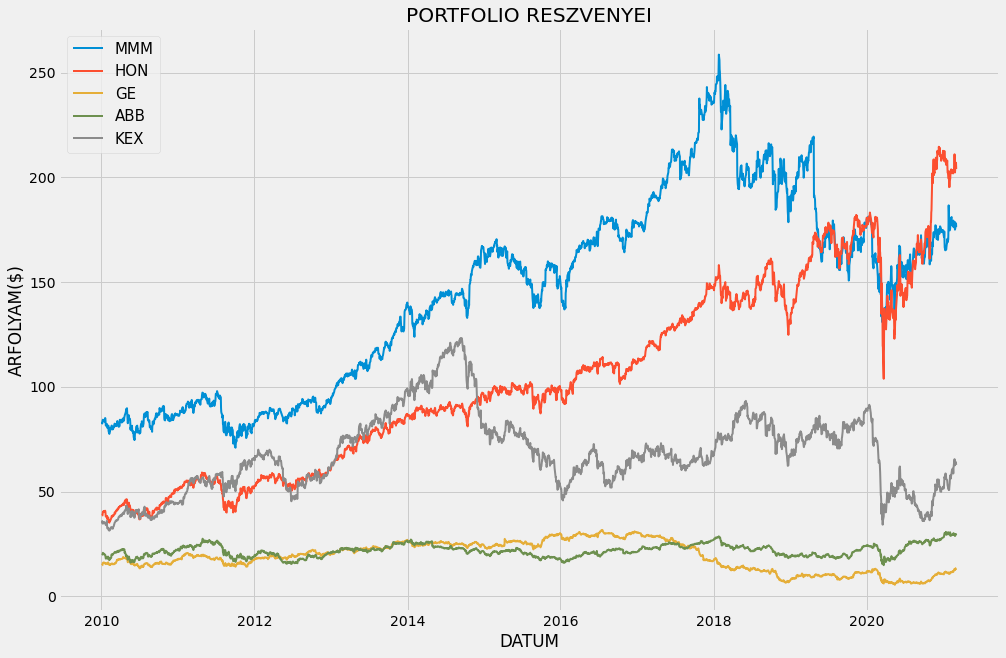

In [4]:
plt.figure(figsize=(15,10))

for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO RESZVENYEI')


plt.xlabel('DATUM')
plt.ylabel('ARFOLYAM($)')
plt.legend(fontsize=15)
plt.show()

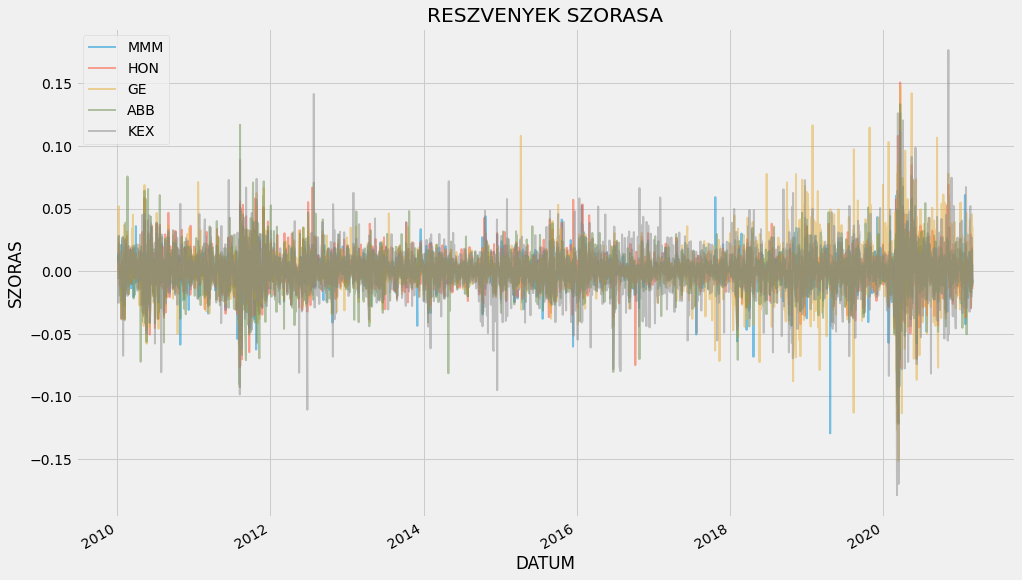

In [5]:
returns = dataframe.pct_change()
returns.plot(alpha=0.5, figsize=(15,10), lw=2)
plt.title('RESZVENYEK SZORASA')
plt.xlabel('DATUM')
plt.ylabel('SZORAS')
plt.show()

In [6]:
# ~250 nap van egy evben
kov_matrix = returns.cov() * 250 
kov_matrix

,MMM,HON,GE,ABB,KEX
MMM,0.046947,0.036181,0.037302,0.034102,0.034316
HON,0.036181,0.055735,0.045756,0.040136,0.044325
GE,0.037302,0.045756,0.099799,0.043375,0.050674
ABB,0.034102,0.040136,0.043375,0.068066,0.042935
KEX,0.034316,0.044325,0.050674,0.042935,0.112856


In [7]:
korr_matrix = returns.corr()
korr_matrix

,MMM,HON,GE,ABB,KEX
MMM,1.000000,0.707328,0.544963,0.603275,0.471445
HON,0.707328,1.000000,0.613504,0.651634,0.558882
GE,0.544963,0.613504,1.000000,0.526277,0.477480
ABB,0.603275,0.651634,0.526277,1.000000,0.489879
KEX,0.471445,0.558882,0.477480,0.489879,1.000000


In [9]:
#3M-be:
mmm_ret = np.sum(returns.loc[:, 'MMM'].mean()*250)*100
mmm_vol = np.sqrt(kov_matrix.iloc[0,0])*100
print('A MMM hozama: {:.2f}'.format(mmm_ret)+'%')
print('A MMM szorasa: {:.2f}'.format(mmm_vol)+'%')

print('-----------------------')

#Honeywell-be:
hon_ret = np.sum(returns.loc[:, 'HON'].mean()*250)*100
hon_vol = np.sqrt(kov_matrix.iloc[1,1])*100
print('Az HON hozama: {:.2f}'.format(hon_ret)+'%')
print('Az HON szorasa: {:.2f}'.format(hon_vol)+'%')

print('-----------------------')

#General Electric-be:
ge_ret = np.sum(returns.loc[:, 'GE'].mean()*250)*100
ge_vol = np.sqrt(kov_matrix.iloc[2,2])*100
print('A GE hozama: {:.2f}'.format(ge_ret)+'%')
print('A GE szorasa: {:.2f}'.format(ge_vol)+'%')

print('-----------------------')

#Abb-be:
abb_ret = np.sum(returns.loc[:, 'ABB'].mean()*250)*100
abb_vol = np.sqrt(kov_matrix.iloc[3,3])*100
print('Az ABB hozama: {:.2f}'.format(abb_ret)+'%')
print('Az ABB szorasa: {:.2f}'.format(abb_vol)+'%')

print('-----------------------')

#Kirby Corp-ba:
kex_ret = np.sum(returns.loc[:, 'KEX'].mean()*250)*100
kex_vol = np.sqrt(kov_matrix.iloc[4,4])*100
print('A KEX hozama: {:.2f}'.format(kex_ret)+'%')
print('A KEX szorasa: {:.2f}'.format(kex_vol)+'%')

A MMM hozama: 9.07%
A MMM szorasa: 21.67%
-----------------------
Az HON hozama: 17.63%
Az HON szorasa: 23.61%
-----------------------
A GE hozama: 4.10%
A GE szorasa: 31.59%
-----------------------
Az ABB hozama: 6.95%
Az ABB szorasa: 26.09%
-----------------------
A KEX hozama: 10.89%
A KEX szorasa: 33.59%
